In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown --id 15lHBMtQsyBOLTvqZ5v-FatNSIH8QhW5S
# 1-kv4pFN-1tb4Edv4TIfo9MpwlHC1Gn51

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15lHBMtQsyBOLTvqZ5v-FatNSIH8QhW5S
To: /content/MGMT.zip
100% 22.7M/22.7M [00:00<00:00, 74.9MB/s]


In [ ]:
!unzip "/content/MGMT.zip"

Archive:  /content/MGMT.zip
   creating: MGMT/
   creating: MGMT/zero/
  inflating: MGMT/zero/T1w_1287_Image-126.jpg  
  inflating: MGMT/zero/T1w_1286_Image-125.jpg  
  inflating: MGMT/zero/T1w_10666_Image-52.jpg  
  inflating: MGMT/zero/T1w_1284_Image-123.jpg  
  inflating: MGMT/zero/T1w_1282_Image-121.jpg  
  inflating: MGMT/zero/T1w_1281_Image-120.jpg  
  inflating: MGMT/zero/T1w_1278_Image-118.jpg  
  inflating: MGMT/zero/T1w_1277_Image-117.jpg  
  inflating: MGMT/zero/T1w_1276_Image-116.jpg  
  inflating: MGMT/zero/T1w_1273_Image-113.jpg  
  inflating: MGMT/zero/T1w_1272_Image-112.jpg  
  inflating: MGMT/zero/T1w_1271_Image-111.jpg  
  inflating: MGMT/zero/T1w_1270_Image-110.jpg  
  inflating: MGMT/zero/T1w_1265_Image-106.jpg  
  inflating: MGMT/zero/T1w_1261_Image-102.jpg  
  inflating: MGMT/zero/T1w_1255_Image-98.jpg  
  inflating: MGMT/zero/T1w_1253_Image-96.jpg  
  inflating: MGMT/zero/T1w_1252_Image-95.jpg  
  inflating: MGMT/zero/T1w_1250_Image-93.jpg  
  inflating: MGMT/zer

# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv("/content/train_labels.csv")
train_df

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


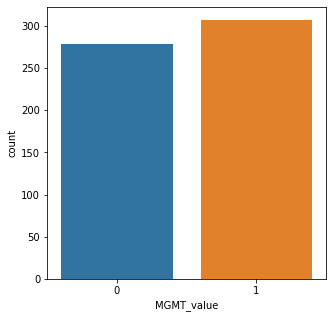

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=train_df, x="MGMT_value");

# **Preprocessing**

In [ ]:
#importing basic libraries
import numpy as np
import os
import math
import shutil
import glob


In [ ]:

# count no. of images in the respective classes (0-Un-Methyl) and (1-Methyl)  
ROOT_DIR = "/content/MGMT"
# Creating Dictionary
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('zero', 2015), ('one', 1780)])

In [ ]:
os.listdir("/content/MGMT")

['zero', 'one']

In [ ]:

def dataFolder(p, split):
 # we will create a Test Folder
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)
        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+p+"/"+dir)
            for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)), 
                                     size = (math.floor(split*number_of_images[dir])-5),
                                     replace=False):
                O = os.path.join(ROOT_DIR,dir,img) #path
                D = os.path.join("./"+p,dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print(f"{p} Folder already exists")

In [ ]:
dataFolder("train",0.70)

In [ ]:
dataFolder("test",0.15)

In [ ]:
dataFolder("val",0.15) 

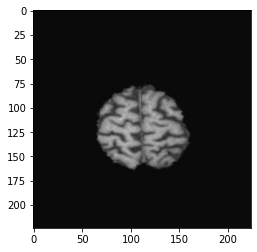

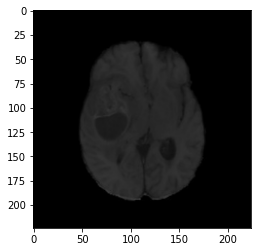

In [ ]:
import cv2
from os import listdir
import matplotlib.pyplot as plt
count = 1
folder_dir = "/content/train/one/"
for images in os.listdir(folder_dir):
    
    if (images.endswith(".jpg")):
      im = cv2.imread(folder_dir+images)
      im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
      plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
      plt.show()
      count=count+1
      if(count==3):
        break



In [ ]:
import cv2
import numpy as np
def data_load(root_path, scale=(256,256)):
  categories =  os.listdir(root_path) 
  x = []
  y =[]
  for i, cat in enumerate(categories):
    img_path = os.path.join(root_path, cat)
    images = os.listdir(img_path)
    for image in images:
      img = cv2.imread(os.path.join(img_path, image), 0)
      try:
        img = cv2.resize(img, scale)
        x.append(img)
        y.append(i)
      except:
        break
  return np.array(x), np.array(y)
x_train, y_train = data_load(('/content/train/'))
x_test, y_test = data_load(('/content/test/'))


In [ ]:
print ( ' trainset has length of {}'.format(len(x_train)))
print ( ' testset has length of {}'.format(len(x_test)))

 trainset has length of 2646
 testset has length of 559


In [ ]:
import keras
from keras import layers
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(65536,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(65536, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)




In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 65536)]           0         
                                                                 
 dense (Dense)               (None, 32)                2097184   
                                                                 
 dense_1 (Dense)             (None, 65536)             2162688   
                                                                 
Total params: 4,259,872
Trainable params: 4,259,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(2646, 65536)
(559, 65536)


In [ ]:
model = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
11/11 [==============================] - 18s 1s/step - loss: 0.6917 - val_loss: 0.6895
Epoch 2/50
11/11 [==============================] - 12s 1s/step - loss: 0.6878 - val_loss: 0.6855
Epoch 3/50
11/11 [==============================] - 8s 716ms/step - loss: 0.6838 - val_loss: 0.6815
Epoch 4/50
11/11 [==============================] - 8s 714ms/step - loss: 0.6798 - val_loss: 0.6774
Epoch 5/50
11/11 [==============================] - 9s 840ms/step - loss: 0.6757 - val_loss: 0.6734
Epoch 6/50
11/11 [==============================] - 8s 728ms/step - loss: 0.6716 - val_loss: 0.6694
Epoch 7/50
11/11 [==============================] - 9s 783ms/step - loss: 0.6676 - val_loss: 0.6653
Epoch 8/50
11/11 [==============================] - 8s 767ms/step - loss: 0.6636 - val_loss: 0.6613
Epoch 9/50
11/11 [==============================] - 9s 790ms/step - loss: 0.6596 - val_loss: 0.6574
Epoch 10/50
11/11 [==============================] - 9s 770ms/step - loss: 0.6557 - val_loss: 0.6534
Epo

In [ ]:

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


18/18 [==============================] - 0s 12ms/step


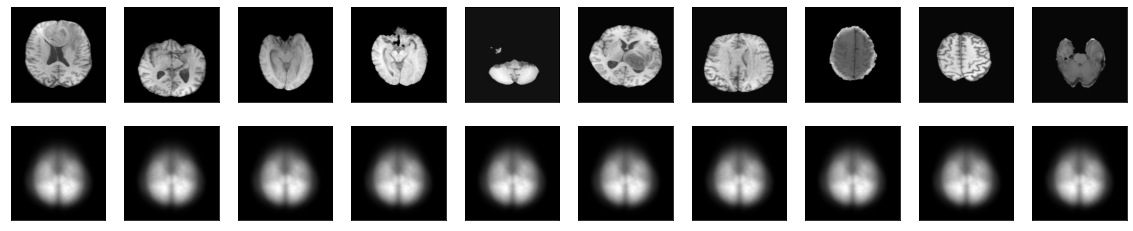

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
# plt.legend()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
def preprocessingImages1(path): # zoom_range rotate the image # preprocessing_function makes the transformation of this data on a random basis
    # horizontal_flip flips both rows and columns horizontally
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range = 0.2, preprocessing_function= preprocess_input, horizontal_flip= True)
    # batch size is the number of training samples utilized in one iteration
    image = image_data.flow_from_directory(directory=path,target_size = (244,244), batch_size=32,class_mode="binary")
    return image

In [ ]:
path =  "/content/train/"
train_data = preprocessingImages1(path)

Found 2646 images belonging to 2 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet,preprocess_input

In [ ]:
def preprocessingImages2(path):
    image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
    image = image_data.flow_from_directory(directory=path,target_size = (244,244), batch_size=32,class_mode="binary")
    return image

In [ ]:
path =  "/content/test/"
test_data = preprocessingImages2(path)

Found 559 images belonging to 2 classes.


In [ ]:
path =  "/content/val/"
val_data = preprocessingImages2(path)

Found 559 images belonging to 2 classes.


In [ ]:
# Model Training
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
import keras

In [ ]:
base_model = MobileNet(input_shape=(224,244,3),include_top=False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [114]:
# base_model.summary()

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=1,activation='sigmoid')(X)
model = Model(base_model.input,X)

In [115]:
# model.summary()

In [ ]:
#rmsprop is to increase learning rate, algorithm takes larger steps converging faster
model.compile(optimizer='rmsprop', loss = keras.losses.binary_crossentropy, metrics=["accuracy"])
#binary_crossentropy calculate the cross-entropy loss between the predicted classes and the true classes

In [ ]:
steps_per_epoch = len(test_data) #batch_size
print(steps_per_epoch)
validation_steps = len(val_data) #batch_size # if you have validation data 
print(validation_steps)

18
18


In [ ]:
## callbacks -> after every batch of training to monitor your metrics, perform actions at various stages of training
# Stop training when a monitored metric has stopped improving
# ModelCheckPoint -> model or weights can be loaded later to continue the training from the state saved
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor = "val_accuracy", verbose = 1, save_best_model= True)
es = EarlyStopping (monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1)
cb = [mc,es]

In [113]:
hist = model.fit_generator(train_data,
                           steps_per_epoch = 8, #batch_size
                           epochs=30, # epoches training data for one cycle
                           validation_data=val_data,
                           validation_steps = 16, # len(val_data),
                           callbacks=cb)


Epoch 1/30
8/8[=====================] - 453s 838ms/step - loss: 11.0453 - accuracy: 0.4898 - val_loss: 2.2232 - val_accuracy: 0.2363
Epoch 00001: val_accuracy improved from -inf to 0.23633, saving model to bestmodel.h5
Epoch 2/30
8/8[=====================] - 200s 638ms/step - loss: 3.2459 - accuracy: 0.4193 - val_loss: 0.9141 - val_accuracy: 0.4250
Epoch 00002: val_accuracy improved from 0.2363 to 0.4250, saving model to bestmodel.h5
Epoch 3/30
8/8[=====================] - 389s 640ms/step - loss: 0.4259 - accuracy: 0.9193 - val_loss: 2.1141 - val_accuracy: 0.4150
Epoch 00003: val_accuracy didn't improve from 0.4250
Epoch 4/30
8/8[=====================] - 589s 626ms/step - loss: 1.1527 - accuracy: 0.2578 - val_loss: 0.4104 - val_accuracy: 0.5019
Epoch 00004: val_accuracy improved from 0.4250 to 0.5019, saving model to bestmodel.h5
Epoch 5/30
8/8[=====================] - 109s 655ms/step - loss: 1.958 - accuracy: 0.3695 - val_loss: 0.5001 - val_accuracy: 0.3558
Epoch 00005: val_accuracy d

In [ ]:
# load the best fit model
model = load_model('/content/bestmodel.h5')

In [107]:
acc = model.evaluate_generator(test_data)[1]
print(f"our model accuracy is {acc*100} %")

our model accuracy is 72.02 %


In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

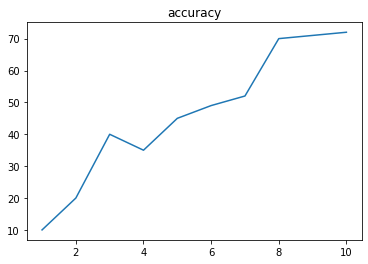

In [106]:
plt.plot(h['accuracy'])
plt.title("Accuracy")
plt.show()

In [124]:
from keras.preprocessing import image
import keras
import tensorflow as tf
import keras.utils as image

In [133]:
# path for image to test our model predict correct or wrong
path = "/content/test/zero/T1w_1208_Image-55.jpg"
img = keras.utils.load_img(path,target_size=(224,244))

i= image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 1:
  print("The MRI image is of Methyl")
else:
  print("The MRI image is of un-Methyl")


1/1 [==============================] - 0s 110ms/step
The MRI image is of un-Methyl
